# Analysis and Winner Prediction in T20 Cricket

In [2]:
#importing imporatant libraries for prediction, data analysis and manipulation.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
##loading the DataSet
df = pd.read_csv('cricket.csv')

In [5]:
#peeking at dataset
df.head()
df.shape

(816, 17)

In [4]:
df = df.replace("Deccan Chargers", "Sunrisers Hyderabad")
df = df.replace("Delhi Daredevils", "Delhi Capitals")
df = df.replace("Pune Warriors", "Rising Pune Supergiants")
df = df.replace("Rising Pune Supergiant", "Rising Pune Supergiants")


# Data Analysis

In [5]:
df.columns


Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
#Checking how many times a particular team won the matches
df['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Sunrisers Hyderabad             95
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

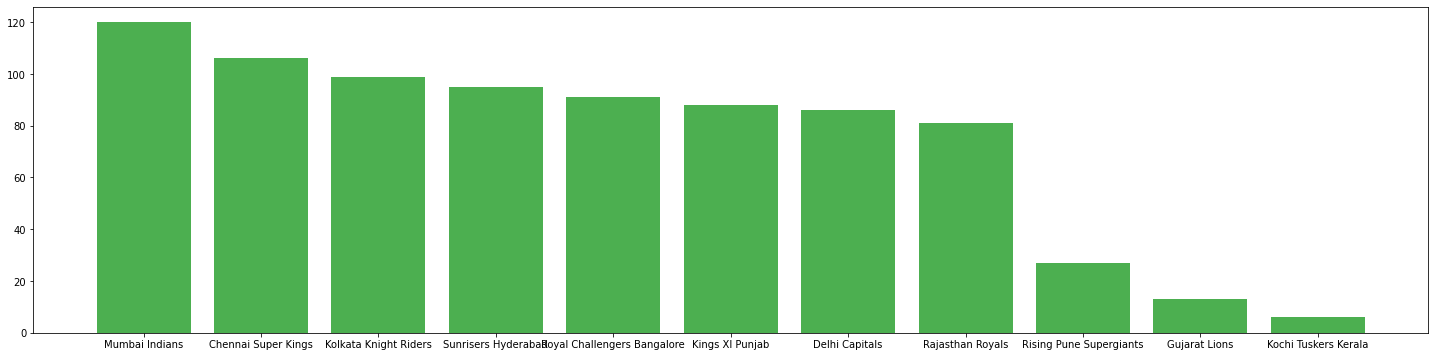

In [7]:
#plotting graph for max number of winners
plt.figure(figsize=(25,6))
x = list(df['winner'].value_counts().keys())
y = list(df['winner'].value_counts())
plt.bar(x, y, color = "#4CAF50")
plt.show()

In [8]:
#Checking how many times a particular team won the toss
df['toss_winner'].value_counts()

Mumbai Indians                 106
Sunrisers Hyderabad            100
Delhi Capitals                 100
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Rising Pune Supergiants         33
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

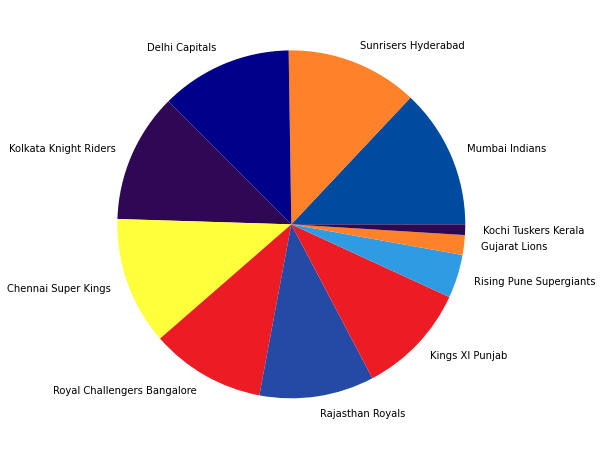

In [9]:
#Making pie graph of number of winning tosses
plt.figure(figsize=(8,8))
x = list(df['toss_winner'].value_counts().keys())
y = list(df['toss_winner'].value_counts())
mycolors = ['#004BA0',"#FF822A","#00008B","#2E0854","#FFFF3C","#EC1C24","#254AA5","#ED1B24","#2F9BE3","#FF822A","#2E0854"]
plt.pie(y, labels=x, colors = mycolors)
plt.show()


In [10]:
#top 10 player with most man of the match list
df['player_of_match'].value_counts()[0:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

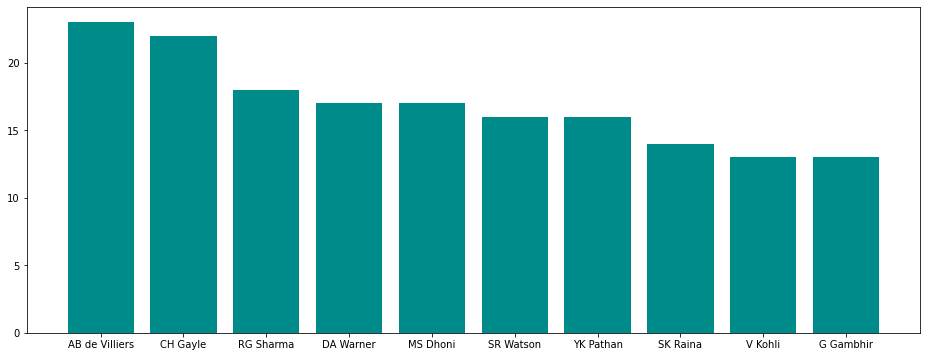

In [11]:
#plotting graph for man of the match
plt.figure(figsize=(16,6))
x = list(df['player_of_match'].value_counts()[0:10].keys())
y = list(df['player_of_match'].value_counts()[0:10])
plt.bar(x, y, color="#008B8B")
plt.show()


In [12]:
#Number of matches in which a team won by battting first
df['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

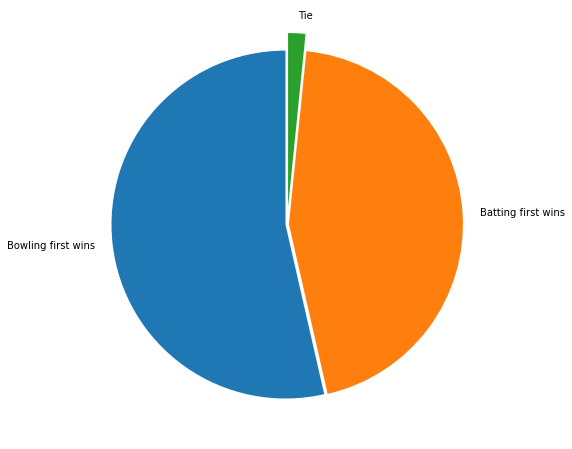

In [13]:
#Making pie graph for number of teams won by batting first and bowling first
plt.figure(figsize=(8,8))
x = ['Bowling first wins','Batting first wins','Tie']
y = list(df['result'].value_counts())
myexplode = [0.01, 0.01, 0.1]
plt.pie(y, labels=x, startangle = 90, explode= myexplode)
plt.show()


In [14]:
#Runs margin of winning team(bat_first)
bat_first = df[df['result'] == 'runs']
bat_first.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
7,335989,Chennai,4/23/2008,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
9,335991,Chandigarh,4/25/2008,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba
14,335996,Bangalore,4/28/2008,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin


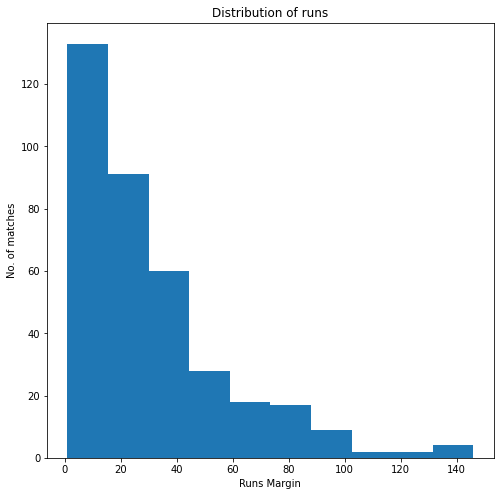

In [15]:
#Making Histogram for winning by runs margin
plt.figure(figsize = (8,8))
plt.hist(bat_first['result_margin'])
plt.title("Distribution of runs")
plt.xlabel("Runs Margin")
plt.ylabel("No. of matches")
plt.show()

In [16]:
df['venue'].value_counts()[0:10]

Eden Gardens                                  77
Feroz Shah Kotla                              74
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Rajiv Gandhi International Stadium, Uppal     64
MA Chidambaram Stadium, Chepauk               57
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Dubai International Cricket Stadium           33
Sheikh Zayed Stadium                          29
Name: venue, dtype: int64

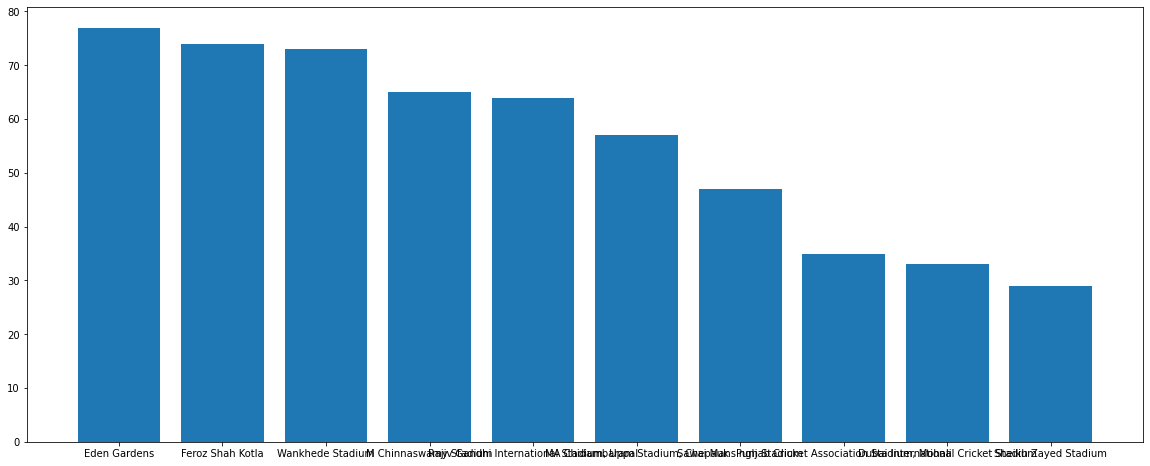

In [17]:
#Bar graph for number of matches played in venue
plt.figure(figsize=(20,8))
x = list(df['venue'].value_counts()[0:10].keys())
y = list(df['venue'].value_counts()[0:10])
plt.bar(x, y)
plt.show()

## Label Encoding of Each team

In [18]:
#Keeping only consistent team
consistent_teams =['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Delhi Capitals']
df.head()
df = df[(df['team1'].isin(consistent_teams)) & (df['team2'].isin(consistent_teams))]
df_teams_1 = df[df['team1'].isin(consistent_teams)]
df_teams_2 = df[df['team2'].isin(consistent_teams)]
df = pd.concat((df_teams_1, df_teams_2))
df.drop_duplicates()
df['team1'].unique()
df.shape


(1402, 17)

In [19]:
#Encoding team name
team_encod = {
    'Kolkata Knight Riders': 1, 
    'Mumbai Indians': 2,
    'Chennai Super Kings': 3,             
    'Royal Challengers Bangalore': 4,     
    'Rajasthan Royals': 5,                
    'Kings XI Punjab':6,                 
    'Delhi Daredevils':7,                
    'Sunrisers Hyderabad':8,             
    'Deccan Chargers': 8,                                    
    'Delhi Capitals': 7,
}
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [20]:
team_encod_col ={
    'team1': team_encod,
    'team2': team_encod,
    'toss_winner': team_encod,
    'winner': team_encod
}
#replacing the name by encoded number
#df = df.replace(team_encod_col)   or  df.replace(team_encod_col, inplace=True)
df = df.replace(team_encod_col)
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,4,1,4,field,1.0,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,6,3,3,bat,3.0,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,7,5,5,bat,7.0,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,2,4,2,bat,4.0,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,1,8,8,bat,1.0,wickets,5.0,N,NaN,BF Bowden,K Hariharan


## Including relevant Features and fixing Null values 

In [21]:
#Including datasets of relevant features(columns) only.
df = df[['city','venue','team1','team2','toss_winner','toss_decision','winner']]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 815
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           1376 non-null   object 
 1   venue          1402 non-null   object 
 2   team1          1402 non-null   int64  
 3   team2          1402 non-null   int64  
 4   toss_winner    1402 non-null   int64  
 5   toss_decision  1402 non-null   object 
 6   winner         1396 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 87.6+ KB


In [22]:
#checking missing values
df[df['winner'].isnull() == True]
#filling missing values
#df['winner'].fillna(0,inplace=True)
df = df.dropna(axis=0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 815
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           1370 non-null   object 
 1   venue          1370 non-null   object 
 2   team1          1370 non-null   int64  
 3   team2          1370 non-null   int64  
 4   toss_winner    1370 non-null   int64  
 5   toss_decision  1370 non-null   object 
 6   winner         1370 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 85.6+ KB


In [24]:
df['team1'].unique()

array([4, 6, 7, 2, 1, 5, 8, 3], dtype=int64)

In [25]:
df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,M Chinnaswamy Stadium,4,1,4,field,1.0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",6,3,3,bat,3.0
2,Delhi,Feroz Shah Kotla,7,5,5,bat,7.0
3,Mumbai,Wankhede Stadium,2,4,2,bat,4.0
4,Kolkata,Eden Gardens,1,8,8,bat,1.0


# Apply one hot encoding to category features

In [26]:
encoded_df = pd.get_dummies(data=df, columns=['team1','team2','toss_winner','city','toss_decision','venue'])

In [27]:
encoded_df.head()

,winner,team1_1,team1_2,team1_3,team1_4,team1_5,team1_6,team1_7,team1_8,team2_1,...,"venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,1.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
encoded_df.shape

(1370, 89)

In [29]:
encoded_df.columns

Index(['winner', 'team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5',
       'team1_6', 'team1_7', 'team1_8', 'team2_1', 'team2_2', 'team2_3',
       'team2_4', 'team2_5', 'team2_6', 'team2_7', 'team2_8', 'toss_winner_1',
       'toss_winner_2', 'toss_winner_3', 'toss_winner_4', 'toss_winner_5',
       'toss_winner_6', 'toss_winner_7', 'toss_winner_8', 'city_Abu Dhabi',
       'city_Ahmedabad', 'city_Bangalore', 'city_Bengaluru',
       'city_Bloemfontein', 'city_Cape Town', 'city_Centurion',
       'city_Chandigarh', 'city_Chennai', 'city_Cuttack', 'city_Delhi',
       'city_Dharamsala', 'city_Dubai', 'city_Durban', 'city_East London',
       'city_Hyderabad', 'city_Indore', 'city_Jaipur', 'city_Johannesburg',
       'city_Kimberley', 'city_Kolkata', 'city_Mumbai', 'city_Nagpur',
       'city_Port Elizabeth', 'city_Pune', 'city_Raipur', 'city_Ranchi',
       'city_Sharjah', 'city_Visakhapatnam', 'toss_decision_bat',
       'toss_decision_field', 'venue_Barabati Stadium',
       'ven

In [30]:
#Encoding city, venue, toss_decision with label encoding
#from sklearn.preprocessing import LabelEncoder

#ftr_list = ['city','toss_decision','venue']
#encoder = LabelEncoder()
#for ftr in ftr_list:
    #encoded_df[ftr] = encoder.fit_transform(encoded_df[ftr])
    #print(encoder.classes_)

In [31]:
#encoded_df = pd.get_dummies(data=encoded_df, columns=['city','toss_decision','venue'])

In [32]:
encoded_df.columns
print(encoded_df.columns.tolist())

['winner', 'team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5', 'team1_6', 'team1_7', 'team1_8', 'team2_1', 'team2_2', 'team2_3', 'team2_4', 'team2_5', 'team2_6', 'team2_7', 'team2_8', 'toss_winner_1', 'toss_winner_2', 'toss_winner_3', 'toss_winner_4', 'toss_winner_5', 'toss_winner_6', 'toss_winner_7', 'toss_winner_8', 'city_Abu Dhabi', 'city_Ahmedabad', 'city_Bangalore', 'city_Bengaluru', 'city_Bloemfontein', 'city_Cape Town', 'city_Centurion', 'city_Chandigarh', 'city_Chennai', 'city_Cuttack', 'city_Delhi', 'city_Dharamsala', 'city_Dubai', 'city_Durban', 'city_East London', 'city_Hyderabad', 'city_Indore', 'city_Jaipur', 'city_Johannesburg', 'city_Kimberley', 'city_Kolkata', 'city_Mumbai', 'city_Nagpur', 'city_Port Elizabeth', 'city_Pune', 'city_Raipur', 'city_Ranchi', 'city_Sharjah', 'city_Visakhapatnam', 'toss_decision_bat', 'toss_decision_field', 'venue_Barabati Stadium', 'venue_Brabourne Stadium', 'venue_Buffalo Park', 'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Ac

In [33]:
#Before one hot encoding 
df

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,M Chinnaswamy Stadium,4,1,4,field,1.0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",6,3,3,bat,3.0
2,Delhi,Feroz Shah Kotla,7,5,5,bat,7.0
3,Mumbai,Wankhede Stadium,2,4,2,bat,4.0
4,Kolkata,Eden Gardens,1,8,8,bat,1.0
...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,4,2,2,field,4.0
812,Dubai,Dubai International Cricket Stadium,2,7,7,field,2.0
813,Abu Dhabi,Sheikh Zayed Stadium,4,8,8,field,8.0
814,Abu Dhabi,Sheikh Zayed Stadium,7,8,7,bat,7.0


In [34]:
#After one hot encoding
encoded_df


,winner,team1_1,team1_2,team1_3,team1_4,team1_5,team1_6,team1_7,team1_8,team2_1,...,"venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,1.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,4.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,8.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
814,7.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Machine Learning Model

In [35]:
#Importing the train_test_split from sklearn modules for spliting training and testing data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(encoded_df, test_size=0.2, random_state=2)
print(train_df.shape)
print(test_df.shape)


(1096, 89)
(274, 89)


In [36]:
#Importing the Classification algorithms(classifier) from sklearn module.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Choosing the features(input) and label(output) of our ML model.
target_var = ['winner']
#predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
predictor_var = ['team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5', 'team1_6', 'team1_7', 'team1_8',
                 'team2_1', 'team2_2', 'team2_3', 'team2_4', 'team2_5', 'team2_6', 'team2_7', 'team2_8',
                 'toss_winner_1', 'toss_winner_2', 'toss_winner_3', 'toss_winner_4', 'toss_winner_5', 'toss_winner_6',
                 'toss_winner_7', 'toss_winner_8', 'city_Abu Dhabi', 'city_Ahmedabad', 'city_Bangalore', 'city_Bengaluru',
                 'city_Bloemfontein', 'city_Cape Town', 'city_Centurion', 'city_Chandigarh', 'city_Chennai', 'city_Cuttack',
                 'city_Delhi', 'city_Dharamsala', 'city_Dubai', 'city_Durban', 'city_East London', 'city_Hyderabad',
                 'city_Indore', 'city_Jaipur', 'city_Johannesburg', 'city_Kimberley', 'city_Kolkata', 'city_Mumbai',
                 'city_Nagpur', 'city_Port Elizabeth', 'city_Pune', 'city_Raipur', 'city_Ranchi', 'city_Sharjah',
                 'city_Visakhapatnam', 'toss_decision_bat', 'toss_decision_field', 'venue_Barabati Stadium',
                 'venue_Brabourne Stadium', 'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
                 'venue_Dr DY Patil Sports Academy', 'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                 'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
                 'venue_Himachal Pradesh Cricket Association Stadium', 'venue_Holkar Cricket Stadium',
                 'venue_JSCA International Stadium Complex', 'venue_Kingsmead', 'venue_M Chinnaswamy Stadium',
                 'venue_M.Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
                 'venue_Maharashtra Cricket Association Stadium', 'venue_New Wanderers Stadium', 'venue_Newlands',
                 'venue_OUTsurance Oval', 'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
                 'venue_Punjab Cricket Association Stadium, Mohali', 'venue_Rajiv Gandhi International Stadium, Uppal',
                 'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
                 'venue_Shaheed Veer Narayan Singh International Stadium', 'venue_Sharjah Cricket Stadium',
                 'venue_Sheikh Zayed Stadium', 'venue_St Georges Park', 'venue_Subrata Roy Sahara Stadium',
                 'venue_SuperSport Park', 'venue_Vidarbha Cricket Association Stadium, Jamtha', 'venue_Wankhede Stadium']

## Comparative Analysis of Algorithm for Winner Prediction 

In [38]:
#Training ML model using SVC Classifier.
model = svm.SVC()
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.6861313868613139


Text(51.0, 0.5, 'Truth')

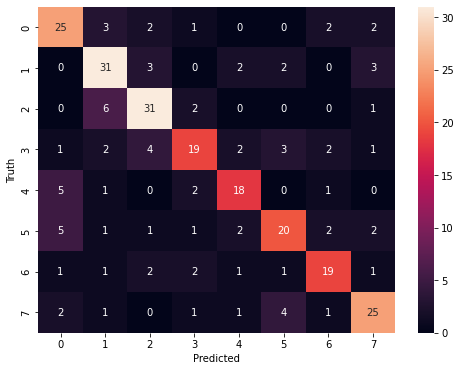

In [39]:
#Confusion matrix for SVC Classifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
#Training ML model using Random Forest Classifier
model = RandomForestClassifier(n_estimators=50)
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.7408759124087592


Text(51.0, 0.5, 'Truth')

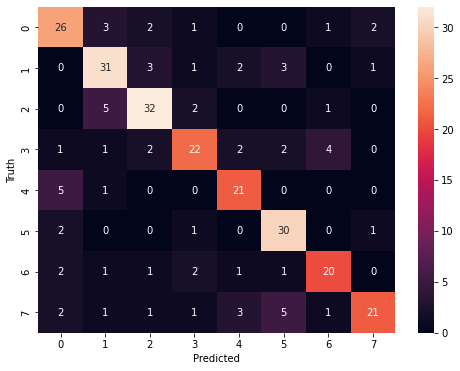

In [41]:
#Confusion matrix for SVC Classifier
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
#Training ML model using Logistic Regression
model = LogisticRegression()
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.6313868613138686


Text(51.0, 0.5, 'Truth')

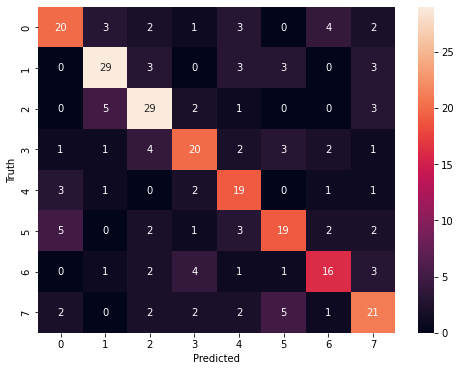

In [43]:
#Confusion matrix for Logistic Regression
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
#Training ML model using DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5)
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.7335766423357665


Text(51.0, 0.5, 'Truth')

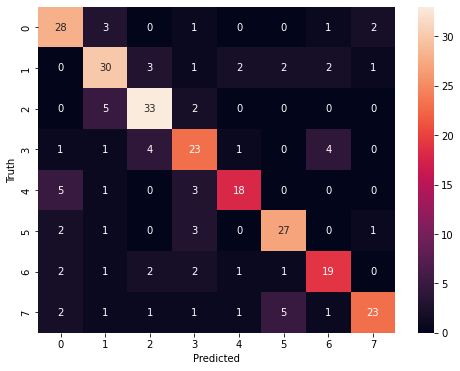

In [45]:
#Confusion matrix for DecisionTreeClassifier
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
#Training ML model using KNN Classifier.
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.6021897810218978


Text(51.0, 0.5, 'Truth')

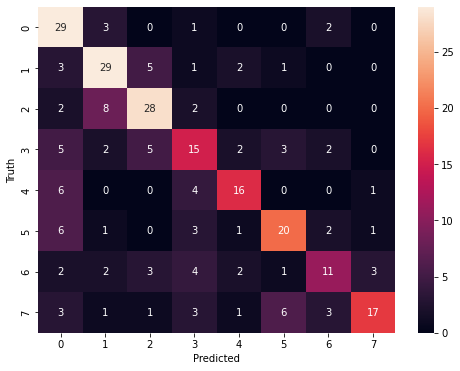

In [47]:
#Confusion matrix for KNN Classifier.
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
#Training ML model using Naives Bayes
model = GaussianNB()
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.2956204379562044


Text(51.0, 0.5, 'Truth')

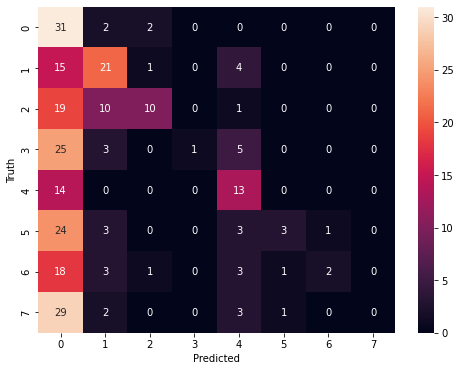

In [49]:
#Confusion matrix for Naives Bayes.
cn = confusion_matrix(test_df[target_var],predictions)
plt.figure(figsize = (8,6))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
#Cross validation
from sklearn.model_selection import KFold
model = DecisionTreeClassifier(random_state=5)
kfold_validation = KFold(10)

from sklearn.model_selection import cross_val_score
results = cross_val_score(model,train_df[predictor_var],train_df[target_var],cv=kfold_validation)
print(results)
print(np.mean(results))

[0.79090909 0.7        0.69090909 0.7        0.74545455 0.66363636
 0.76146789 0.73394495 0.65137615 0.72477064]
0.7162468723936615


In [51]:
row_1=encoded_df.iloc[2]
print((row_1).tolist())

[7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [52]:
#Checking model with live data.
model = DecisionTreeClassifier(random_state=5)
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
                              0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                              0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
                              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
print(predictions)

[7.]


C:\Python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

#Training ML model using SVC Classifier.
model = BaggingClassifier()
model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])

#Calculating accuracy using  actual classification and predicted predicted classification.
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.6970802919708029
